# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.


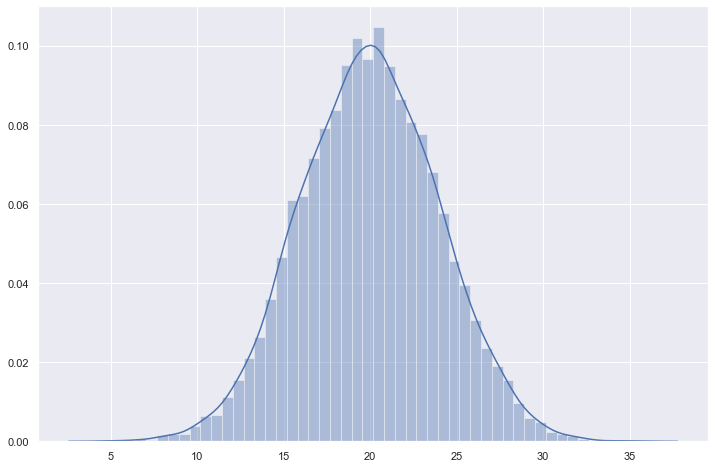

In [5]:
# plotando o gráfico da normal
sns.distplot(sct.norm.rvs(20, 4, size=10000))

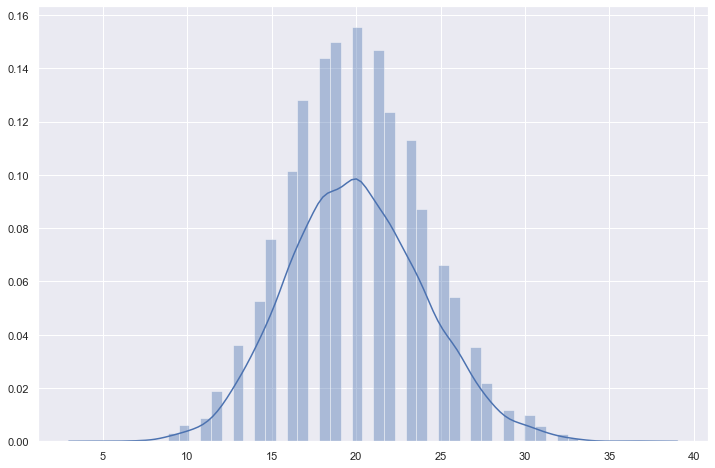

In [6]:
sns.distplot(sct.binom.rvs(100, 0.2, size=10000))

### 1. valores básicos das distribuições

In [7]:
dic_normal =pd.DataFrame({
'média':dataframe['normal'].mean(),
'mediana':dataframe['normal'].median(),
'desv_padrao':dataframe['normal'].std(), 
'maior_valor':dataframe['normal'].max(),
'menor_valor':dataframe['normal'].min(),
'variancia':dataframe['normal'].var()},index = [0])
dic_normal

,média,mediana,desv_padrao,maior_valor,menor_valor,variancia
0,19.991456,19.98962,4.01385,35.704951,4.310399,16.110988


In [8]:
dic_binomial =pd.DataFrame({
'média':dataframe['binomial'].mean(),
'mediana':dataframe['binomial'].median(),
'desv_padrao':dataframe['binomial'].std(), 
'maior_valor':dataframe['binomial'].max(),
'menor_valor':dataframe['binomial'].min(),
'variancia':dataframe['binomial'].var()},index = [0])
dic_binomial

,média,mediana,desv_padrao,maior_valor,menor_valor,variancia
0,20.097,20.0,4.041191,36,6,16.331224


In [9]:
# calculando os percentis para a distribuição normal
q1_norm = sct.scoreatpercentile(dataframe['normal'],25)
q2_norm = sct.scoreatpercentile(dataframe['normal'],50)
q3_norm = sct.scoreatpercentile(dataframe['normal'],75)
q1_norm, q2_norm, q3_norm

(17.30963787997159, 19.98962009682849, 22.68432355145866)

In [10]:
# calculando os percentis para a distribuição binomial
q1_binom = sct.scoreatpercentile(dataframe['binomial'],25)
q2_binom = sct.scoreatpercentile(dataframe['binomial'],50)
q3_binom = sct.scoreatpercentile(dataframe['binomial'],75)
q1_binom, q2_binom, q3_binom

(17.0, 20.0, 23.0)

In [11]:
# média, variância e desvio padrão das distribuições
m_norm = dataframe['normal'].mean()
v_norm = dataframe['normal'].var()
desv_p_norm = dataframe['normal'].std()
m_binom = dataframe['binomial'].mean()
v_binom = dataframe['binomial'].var()
desv_p_binom = dataframe['binomial'].std()

##### Questão 1

In [12]:
quartil_normal = np.percentile(dataframe['normal'], [25, 50, 75])
quartil_binomial = np.percentile(dataframe['binomial'], [25, 50, 75])
dif_quartis = tuple(np.around(quartil_normal-quartil_binomial, 3))
dif_quartis

(0.31, -0.01, -0.316)

In [13]:
#Definindo os intervalos
z1 = m_norm - desv_p_norm
z2 = m_norm + desv_p_norm
z1, z2

(15.977606544512678, 24.00530558853991)

In [14]:
#calculando a CDF empírica 
ecdf = ECDF(dataframe['normal'])
prob = ecdf(z2)-ecdf(z1)
prob


0.6838

In [16]:
# diferênça entre as médias e variâncias
round(m_binom - m_norm,3),round(v_binom - v_norm,3)

(0.106, 0.22)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [17]:
def q1():
    quartil_normal = np.percentile(dataframe['normal'], [25, 50, 75])
    quartil_binomial = np.percentile(dataframe['binomial'], [25, 50, 75])
    dif_quartis = tuple(np.around(quartil_normal-quartil_binomial, 3))
    return dif_quartis
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [18]:
def q2():
    z1 = m_norm - desv_p_norm
    z2 = m_norm + desv_p_norm
    ecdf = ECDF(dataframe['normal'])
    prob = ecdf(z2)-ecdf(z1)
    return round(float(prob),3)
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [19]:
def q3():
    dif_mean_var = round(m_binom - m_norm,3),round(v_binom - v_norm,3)
    return dif_mean_var
    pass

Para refletir:

* Você esperava valores dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [20]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [21]:
# Sua análise da parte 2 começa aqui.


In [22]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [23]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [24]:
#filtrando valores de interesse
aux=stars.loc[stars['target']==False]

In [25]:
mean_profile = aux['mean_profile']

In [26]:
mean_profile.head()

0    102.507812
1    103.015625
2    136.750000
3     88.726562
4     93.570312
Name: mean_profile, dtype: float64

In [27]:
mean_profile.describe()

count    16258.000000
mean       116.561250
std         17.475456
min         17.210938
25%        105.251953
50%        117.257812
75%        128.281250
max        192.617188
Name: mean_profile, dtype: float64

In [28]:
#padronizando a variável mean_profile
false_pulsar_mean_profile_standardized = ((mean_profile - mean_profile.mean())/mean_profile.std())


In [29]:
#calculando os quantis teóricos para os valores apresentados
quantis_teoricos = tuple(sct.norm.ppf([0.80,0.90,0.95],0,1))
quantis_teoricos

(0.8416212335729143, 1.2815515655446004, 1.6448536269514722)

In [30]:
# calculando a probabilidade associada aos quantis_teoricos
prob = ECDF(false_pulsar_mean_profile_standardized)(quantis_teoricos).round(3)
prob

array([0.806, 0.911, 0.959])

In [31]:
# calculo de diferenças entre quantis
quantil_normal = sct.norm.ppf([0.25, 0.50, 0.75],0,1)
quantil_teorico = np.percentile(false_pulsar_mean_profile_standardized, [25, 50, 75])
dif_quantis = tuple(np.around(quantil_teorico - quantil_normal, 3))
dif_quantis

(0.027, 0.04, -0.004)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [32]:
def q4():
    aux=stars.loc[stars['target']==False]
    mean_profile = aux['mean_profile']
    false_pulsar_mean_profile_standardized = ((mean_profile - mean_profile.mean())/mean_profile.std())
    quantis_teoricos = tuple(sct.norm.ppf([0.80,0.90,0.95],0,1))
    prob = ECDF(false_pulsar_mean_profile_standardized)(quantis_teoricos).round(3)
    return tuple(prob)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [33]:
def q5():
    aux=stars.loc[stars['target']==False]
    mean_profile = aux['mean_profile']
    false_pulsar_mean_profile_standardized = ((mean_profile - mean_profile.mean())/mean_profile.std())
    quantil_normal = sct.norm.ppf([0.25, 0.50, 0.75],0,1)
    quantil_teorico = np.percentile(false_pulsar_mean_profile_standardized, [25, 50, 75])
    dif_quantis = tuple(np.around(quantil_teorico - quantil_normal, 3))
    return dif_quantis
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.